/var/folders/7q/63cgxnn50sl5zwxkchv_j2cr0000gn/T/ipykernel_14402/3584942142.py:15: DtypeWarning: Columns (2,3,5,9,11,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  policy_data = pd.read_csv('../DataFiles/2024-srcsc-superlife-inforce-dataset.csv')


36961

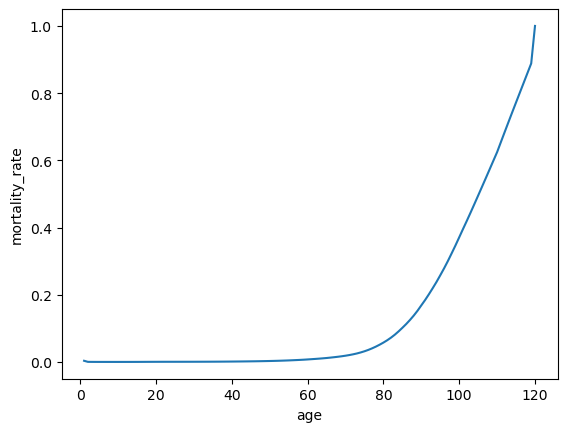

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


mr = pd.read_csv('../DataFiles/mortality_rate.csv')

sns.lineplot(data = mr, x = 'age', y = 'mortality_rate')

econ_data = pd.read_csv('../DataFiles/economic_data.csv')

econ_data

policy_data = pd.read_csv('../DataFiles/2024-srcsc-superlife-inforce-dataset.csv')

policy_data = policy_data.drop([0,1])
policy_data.index = range(0, policy_data.shape[0])
policy_data.columns = policy_data.iloc[0,:]
policy_data = policy_data.drop([0])

policy_data.columns = [c.replace('.','_').lower() for c in policy_data.columns]

policy_data.death_indicator.describe()

policy_data.death_indicator.value_counts().index

policy_data.death_indicator.shape[0]- sum([1 if i == 1 else 0 for i in policy_data.death_indicator.isna()])

policy_data.death_indicator.shape[0]- sum([0 if i == 1 else 1 for i in policy_data.death_indicator])

In [2]:
policy_data.lapse_indicator.fillna(0)

1         1
2         0
3         1
4         1
5         1
         ..
978578    0
978579    0
978580    0
978581    0
978582    0
Name: lapse_indicator, Length: 978582, dtype: object

In [3]:
policy_data.year_of_lapse[policy_data.lapse_indicator=='Y'].unique()
# a lapse indicator of 'Y' is also associated with a year of lapse

array([2017.0, 2020.0, 2011.0, 2010.0, 2015.0, 2008.0, 2009.0, 2022.0,
       2013.0, 2012.0, 2019.0, 2018.0, 2014.0, 2021.0, 2016.0, 2023.0],
      dtype=object)

In [4]:
policy_data.death_indicator = policy_data.death_indicator.fillna(0)
policy_data.lapse_indicator[policy_data.lapse_indicator == 'Y'] = 1

In [5]:
policy_data.death_indicator = policy_data.death_indicator.fillna(0)

In [6]:
policy_data = policy_data.astype({'issue_year':'int', 'issue_age':'int',
    'face_amount':'int',  'year_of_death':'float', 'death_indicator': 'float',
    'year_of_lapse':'float', 'lapse_indicator': 'float', 'region':'int'})

                 # 'year_of_death':'int', 'lapse_indicator': 'int', 
                 # 'year_of_lapse':'int'})

In [7]:
policy_data.region.unique()

array([1, 6, 2, 3, 4, 5])

In [8]:
policy_data.sex.unique()

array(['F', 'M'], dtype=object)

In [9]:
policy_data.columns

Index(['policy_number', 'policy_type', 'issue_year', 'issue_age', 'sex',
       'face_amount', 'smoker_status', 'underwriting_class', 'urban_vs_rural',
       'region', 'distribution_channel', 'death_indicator', 'year_of_death',
       'lapse_indicator', 'year_of_lapse', 'cause_of_death'],
      dtype='object')

In [10]:
# Convert variables to indicators and ordinals

policy_data = policy_data.convert_dtypes()

conversions = {'sex': {'F': 0, 'M': 1},
'underwriting_class': {'very low risk': 0, 'low risk': 1, 'moderate risk': 2,
'high risk': 3},
'urban_vs_rural': {'Urban': 0, 'Rural': 1},
'smoker_status': {'NS':0, 'S':1}}

In [11]:
for c in list(conversions.keys()):
    policy_data[c] = [conversions[c][val] for val in policy_data[c]]

In [12]:
policy_data['age_at_death'] = policy_data['year_of_death'] - \
    policy_data['issue_year'] + policy_data['issue_age']
policy_data['age_at_lapse'] = policy_data['year_of_lapse'] - \
    policy_data['issue_year'] + policy_data['issue_age']

([<matplotlib.axis.XTick at 0x7f9394f67520>,
 [Text(0, 0, '26'),
  Text(8, 0, '34'),
  Text(16, 0, '42'),
  Text(24, 0, '50'),
  Text(32, 0, '58'),
  Text(40, 0, '66'),
  Text(48, 0, '74'),
  Text(56, 0, '82')])

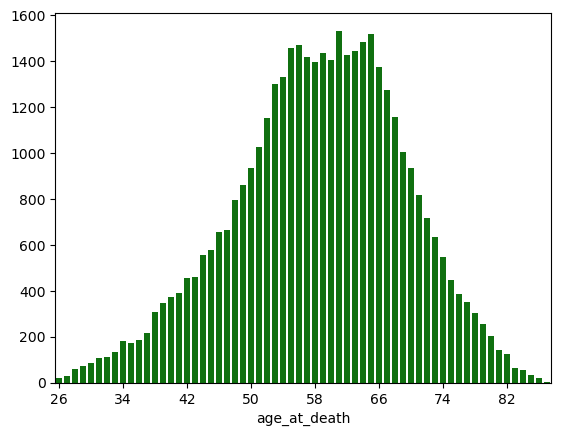

In [13]:
sns.barplot(x = policy_data['age_at_death'].value_counts().index, 
           y = policy_data['age_at_death'].value_counts().values, color = 'g')
plt.xticks(ticks = np.arange(0,88-26,8))

In [14]:
policy_data[(policy_data.death_indicator == 1) &  
(policy_data.lapse_indicator == 1)]
# no policies that have lapsed have death info.

,policy_number,policy_type,issue_year,issue_age,sex,face_amount,smoker_status,underwriting_class,urban_vs_rural,region,distribution_channel,death_indicator,year_of_death,lapse_indicator,year_of_lapse,cause_of_death,age_at_death,age_at_lapse


In [15]:
# determine number of years each policy was in effect
policy_data['years_in_effect'] = 0
policy_data.loc[policy_data.death_indicator == 1, 'years_in_effect'] = \
    policy_data.year_of_death - policy_data.loc[
        policy_data.death_indicator == 1, 'issue_year']

policy_data.loc[policy_data.lapse_indicator == 1,'years_in_effect'] = \
    policy_data.year_of_lapse - policy_data.loc[
        policy_data.lapse_indicator == 1, 'issue_year']

policy_data.loc[((policy_data.lapse_indicator != 1) & 
                  (policy_data.death_indicator != 1)), 'years_in_effect'] = \
     2023 - policy_data.loc[((policy_data.lapse_indicator != 1) & 
                  (policy_data.death_indicator != 1)),'issue_year']

In [21]:
policy_data['max_age'] = policy_data.years_in_effect + policy_data.issue_age

In [25]:
policy_data['max_age'].describe()

count     978582.0
mean     45.818011
std      10.726161
min           26.0
25%           38.0
50%           46.0
75%           53.0
max           87.0
Name: max_age, dtype: Float64

In [33]:
policy_data['max_age'].value_counts().sort_index()

max_age
26    16419
27    16397
28    16788
29    16814
30    17219
      ...  
83       64
84       56
85       31
86       20
87        2
Name: count, Length: 62, dtype: Int64

In [58]:
policy_data.columns

Index(['policy_number', 'policy_type', 'issue_year', 'issue_age', 'sex',
       'face_amount', 'smoker_status', 'underwriting_class', 'urban_vs_rural',
       'region', 'distribution_channel', 'death_indicator', 'year_of_death',
       'lapse_indicator', 'year_of_lapse', 'cause_of_death', 'age_at_death',
       'age_at_lapse', 'years_in_effect', 'max_age_attained', 'max_age'],
      dtype='object')

In [61]:
np.count_nonzero(policy_data.death_indicator)

40376

In [64]:
np.count_nonzero(policy_data[policy_data.age_at_death == 63].death_indicator.notna())

1442

In [80]:
def num_lives(policies, age):
    return policies[(policies.max_age >= age) & (policies.issue_age <= age)].shape[0] 

In [96]:
age_range = range(policy_data.max_age.min(), policy_data.max_age.max()+1)

In [104]:
def plot_age_stats(data, title, ylabel):
    sns.barplot(x = data.index, y = data.values, color = 'lightgreen')
    plt.xticks(ticks = np.arange(0,88-26,8))
    plt.title(f'{title}')
    plt.xlabel('Age')
    plt.ylabel(f'{ylabel}')

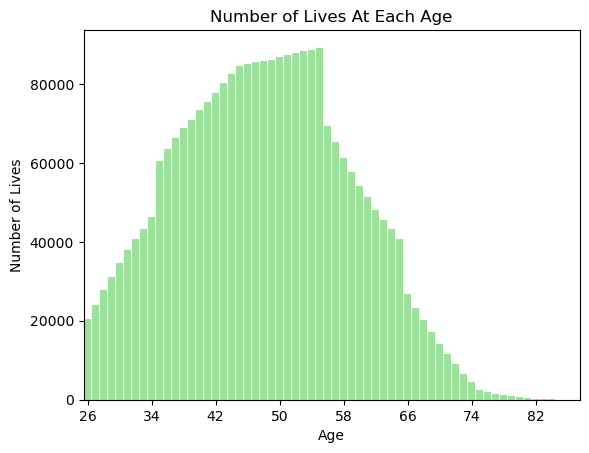

In [105]:
plot_age_stats(life_counts, 'Number of Lives At Each Age', 'Number of Lives')

Trend in mortality rates
Overlay num deaths, num lives on mortality rate

In [ ]:
policy_data.age

In [100]:
def mortality_rate(policies):
    return pd.Series({age:
            policies.age_at_death.value_counts()[age]
            /num_lives(policies,age) for age in age_range})

In [102]:
mr = mortality_rate(policy_data);

In [110]:
def num_lives(policies, age, year):
    return policies[(policies.max_age >= age) & 
                    (policies.issue_age <= age) &
                    (policies.issue_year <= year) & 
                    (policies.max_year >= year)].shape[0]

In [ ]:
def mortality_by_year():
    return policies[(policies.max_age >= age) & 
                    (policies.issue_age <= age) &
                    (policies.issue_year <= year) & 
                    (policies.max_year >= year)].shape[0]

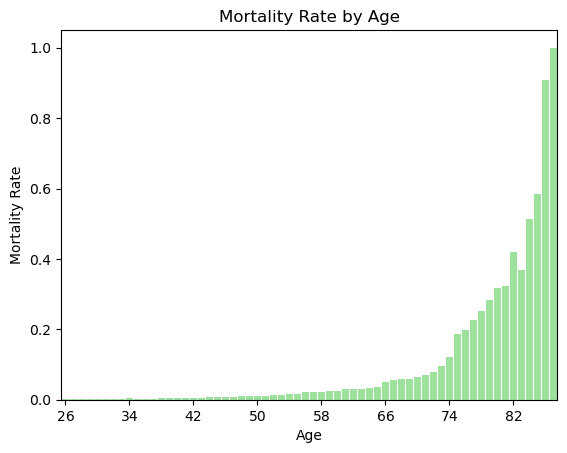

In [106]:
plot_age_stats(mr, 'Mortality Rate by Age', 'Mortality Rate')

In [109]:
policy_data['max_year'] = policy_data.issue_year + policy_data.years_in_effect

In [ ]:
for age in policy_data.age_at_death.value_counts().\
sort_index(ascending=False).values:
    mortality_rate = policy_data[(policy_data.age_at_death == age)].values/\
    (policy_data.issue_age

In [ ]:
policy_data[policy_data['max_age'] == policy_data['max_age'].values

In [ ]:
policy_data[policy_data.issue_age >= 

In [ ]:
policy_data.

In [ ]:
max(policy_data['years_in_effect'].values)

In [ ]:
def policy_check(policy, death_lapse):
    policy.

find p_x_t, q_x_t

In [ ]:
policy_data.issue_age.max()

In [ ]:
max_age = policy_data.issue_age.max()
min_age = policy_data.issue_age.min()
bp = sns.barplot(x = policy_data.issue_age.value_counts().sort_index().index, 
           y= policy_data.issue_age.value_counts().sort_index().values,
           color = 'lightgreen')
bp.set_title('Counts of Issue Age')
bp.set_xticks(np.arange(4,max_age-min_age+1,5))

In [ ]:
policy_data['age_at_death'].value_counts().sort_index(ascending = False)

In [ ]:
policy_data['years_in_effect'].value_counts().sort_index()

In [ ]:
policy_data['age_max'] = policy_data.years_in_effect + policy_data.issue_age

In [ ]:
policy_data['age_max'].value_counts().sort_index(ascending=False)

In [ ]:
policy_data.

In [ ]:
def mort_table(policy_data = policy_data, max_yrs = 22):
    for i in range(0, max_yrs + 1):
        p_x_t_life
        p_x_t_no_lapse
        

In [ ]:
policy_data

In [ ]:
policy_data['years_in_effect'] = np.min(2023,
    np.min(policy_data['year_of_death'], policy_data['year_of_lapse'])) - \
    policy_data['issue_year']
    